In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
rcParams = { 'axes.grid': False,
             'axes.labelsize': 14,
             'xtick.labelsize': 10,
             'ytick.labelsize': 10,
             'font.size': 14,
             'legend.fontsize': 12.0,
             'lines.linewidth': 5.0,
             'figure.figsize': (8.0,6.0)}
plt.rcParams.update(rcParams)

Data source: https://data.worldbank.org

In [3]:
data = pd.read_excel('../data/world_population.xls',sheetname = 'Data', skiprows = 3)
data.shape

(264, 62)

In [4]:
data.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...         2008  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...     101353.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...   27294031.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...   21759420.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...    2947314.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...      83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016  2017  
0    104341.0    104822.0   NaN  
1  33736494.0  34656032.0   NaN  
2  27859305.0  28813463.0   NaN  
3   2880703.0   2876101.0   NaN  
4     78014.0     77281.0   NaN  

[5 rows x 62 columns]

In [5]:
data.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'2017'],
      dtype='object')

It seems that certain columns contain only one value which is not really important. Let's <font color=blue>**show the unique values in those columns**</font>

In [6]:
data['Indicator Name'].unique()

array([u'Population, total'], dtype=object)

In [7]:
data['Indicator Code'].unique()

array([u'SP.POP.TOTL'], dtype=object)

We can definitely <font color=blue>**remove (drop) some columns**</font>, then <font color=blue>**re-set the index**</font> with the column *Country Name*

In [8]:
data.drop([u'Country Code', u'Indicator Name', u'Indicator Code'], axis = 1, inplace = True)
data.set_index('Country Name', inplace = True)

In [9]:
data.tail()

1960        1961        1962        1963        1964  \
Country Name                                                               
Kosovo          947000.0    966000.0    994000.0   1022000.0   1050000.0   
Yemen, Rep.    5172135.0   5260501.0   5351799.0   5446063.0   5543339.0   
South Africa  17396367.0  17850045.0  18322335.0  18809939.0  19308166.0   
Zambia         3044846.0   3140264.0   3240587.0   3345145.0   3452942.0   
Zimbabwe       3747369.0   3870756.0   3999419.0   4132756.0   4269863.0   

                    1965        1966        1967        1968        1969  \
Country Name                                                               
Kosovo         1078000.0   1106000.0   1135000.0   1163000.0   1191000.0   
Yemen, Rep.    5643643.0   5748588.0   5858638.0   5971407.0   6083619.0   
South Africa  19813947.0  20325230.0  20843785.0  21374931.0  21926165.0   
Zambia         3563407.0   3676189.0   3791887.0   3912085.0   4038923.0   
Zimbabwe       4410212.0   4553433.0   4700041.0   4851431.0   5009514.0   

              ...           2008          2009          2010          2011  \
Country Name  ...                                                            
Kosovo        ...   1.747383e+06  1.761474e+06  1.775680e+06  1.791000e+06   
Yemen, Rep.   ...   2.235639e+07  2.297493e+07  2.360678e+07  2.425221e+07   
South Africa  ...   4.955757e+07  5.025581e+07  5.097943e+07  5.172935e+07   
Zambia        ...   1.308252e+07  1.345642e+07  1.385003e+07  1.426476e+07   
Zimbabwe      ...   1.355847e+07  1.381060e+07  1.408632e+07  1.438665e+07   

                      2012          2013          2014          2015  \
Country Name                                                           
Kosovo        1.805200e+06  1.824100e+06  1.821800e+06  1.801800e+06   
Yemen, Rep.   2.490997e+07  2.557632e+07  2.624633e+07  2.691621e+07   
South Africa  5.250652e+07  5.331196e+07  5.414673e+07  5.501198e+07   
Zambia        1.469994e+07  1.515321e+07  1.562097e+07  1.610059e+07   
Zimbabwe      1.471083e+07  1.505451e+07  1.541168e+07  1.577745e+07   

                    2016  2017  
Country Name                    
Kosovo         1816200.0   NaN  
Yemen, Rep.   27584213.0   NaN  
South Africa  55908865.0   NaN  
Zambia        16591390.0   NaN  
Zimbabwe      16150362.0   NaN  

[5 rows x 58 columns]

Calculate the <font color=blue>**sum of all values in each column**</font>. The <font color=blue>**add a row to the existing dataframe**</font>

In [10]:
df = data.sum(axis = 0, numeric_only = True)
data.loc['Sum',df.index.tolist()] = df.values

In [11]:
data.tail()

1960          1961          1962          1963  \
Country Name                                                           
Yemen, Rep.   5.172135e+06  5.260501e+06  5.351799e+06  5.446063e+06   
South Africa  1.739637e+07  1.785004e+07  1.832234e+07  1.880994e+07   
Zambia        3.044846e+06  3.140264e+06  3.240587e+06  3.345145e+06   
Zimbabwe      3.747369e+06  3.870756e+06  3.999419e+06  4.132756e+06   
Sum           3.074286e+10  3.115285e+10  3.170137e+10  3.238315e+10   

                      1964          1965          1966          1967  \
Country Name                                                           
Yemen, Rep.   5.543339e+06  5.643643e+06  5.748588e+06  5.858638e+06   
South Africa  1.930817e+07  1.981395e+07  2.032523e+07  2.084378e+07   
Zambia        3.452942e+06  3.563407e+06  3.676189e+06  3.791887e+06   
Zimbabwe      4.269863e+06  4.410212e+06  4.553433e+06  4.700041e+06   
Sum           3.307214e+10  3.377768e+10  3.452107e+10  3.526311e+10   

                      1968          1969  ...           2008          2009  \
Country Name                              ...                                
Yemen, Rep.   5.971407e+06  6.083619e+06  ...   2.235639e+07  2.297493e+07   
South Africa  2.137493e+07  2.192616e+07  ...   4.955757e+07  5.025581e+07   
Zambia        3.912085e+06  4.038923e+06  ...   1.308252e+07  1.345642e+07   
Zimbabwe      4.851431e+06  5.009514e+06  ...   1.355847e+07  1.381060e+07   
Sum           3.601891e+10  3.681205e+10  ...   7.120639e+10  7.213415e+10   

                      2010          2011          2012          2013  \
Country Name                                                           
Yemen, Rep.   2.360678e+07  2.425221e+07  2.490997e+07  2.557632e+07   
South Africa  5.097943e+07  5.172935e+07  5.250652e+07  5.331196e+07   
Zambia        1.385003e+07  1.426476e+07  1.469994e+07  1.515321e+07   
Zimbabwe      1.408632e+07  1.438665e+07  1.471083e+07  1.505451e+07   
Sum           7.306667e+10  7.399479e+10  7.494165e+10  7.590524e+10   

                      2014          2015          2016  2017  
Country Name                                                  
Yemen, Rep.   2.624633e+07  2.691621e+07  2.758421e+07   NaN  
South Africa  5.414673e+07  5.501198e+07  5.590886e+07   NaN  
Zambia        1.562097e+07  1.610059e+07  1.659139e+07   NaN  
Zimbabwe      1.541168e+07  1.577745e+07  1.615036e+07   NaN  
Sum           7.687698e+10  7.785202e+10  7.883576e+10   NaN  

[5 rows x 58 columns]

Attention, the sum exceeds largely the current world population. Actually, the dataframe contains not only populations of all countries but also of some regions.

<font color=blue>**Find rows where the index column contains the string 'United'**</font>. There are three of them.

In [12]:
data.loc[data.index.str.contains('United')]

1960         1961         1962         1963  \
Country Name                                                               
United Arab Emirates      92634.0     101078.0     112472.0     125566.0   
United Kingdom         52400000.0   52800000.0   53250000.0   53650000.0   
United States         180671000.0  183691000.0  186538000.0  189242000.0   

                             1964         1965         1966         1967  \
Country Name                                                               
United Arab Emirates     138529.0     150362.0     160481.0     170283.0   
United Kingdom         54000000.0   54348050.0   54648500.0   54943600.0   
United States         191889000.0  194303000.0  196560000.0  198712000.0   

                             1968         1969  ...          2008  \
Country Name                                    ...                 
United Arab Emirates     183194.0     203820.0  ...     6894278.0   
United Kingdom         55211700.0   55441750.0  ...    61806995.0   
United States         200706000.0  202677000.0  ...   304093966.0   

                             2009         2010         2011         2012  \
Country Name                                                               
United Arab Emirates    7666393.0    8270684.0    8672475.0    8900453.0   
United Kingdom         62276270.0   62766365.0   63258918.0   63700300.0   
United States         306771529.0  309348193.0  311663358.0  313998379.0   

                             2013         2014         2015         2016  2017  
Country Name                                                                    
United Arab Emirates    9006263.0    9070867.0    9154302.0    9269612.0   NaN  
United Kingdom         64128226.0   64613160.0   65128861.0   65637239.0   NaN  
United States         316204908.0  318563456.0  320896618.0  323127513.0   NaN  

[3 rows x 58 columns]

<font color=blue>**Plot one row of the dataframe**</font>

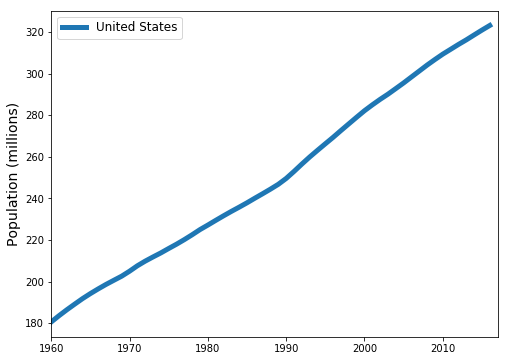

In [13]:
plt.figure()
(1.0e-6 * data.loc['United States',:] ).plot()
plt.legend(['United States'])
plt.ylabel('Population (millions)')

<font color=blue>**Plot some rows of the dataframe**</font>. Note that a <font color=blue>**transpose**</font> command was used to turn columns into the index and vice-versa.

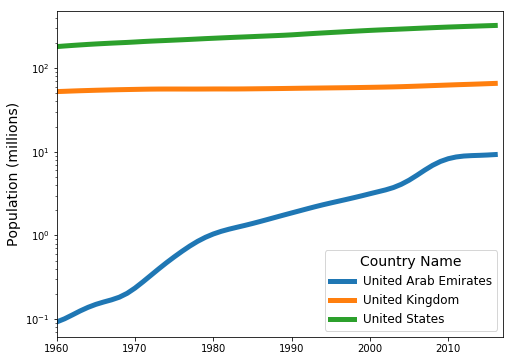

In [14]:
plt.figure()
(1.0e-6 * data.loc[data.index.str.contains('United'),:].transpose() ).plot(logy= True)
plt.ylabel('Population (millions)')